In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns

In [ ]:
# d0 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.1_ce_applied.csv')
# d1 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.5_ce_applied.csv')
# d2 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_0.9_ce_applied.csv')
# d3 = pd.read_csv('sdBShortP_large_Jdot_3_alpha_1.5_ce_applied.csv')

datadir = '../data/models/'

d0 = pd.read_csv(datadir+'sdBShortP_large_Jdot_3_alphaCE_0.1_alphaTH_0_ce_applied.csv')
d1 = pd.read_csv(datadir+'sdBShortP_large_Jdot_3_alphaCE_0.30_alphaTH_0_ce_applied.csv')
d2 = pd.read_csv(datadir+'sdBShortP_large_Jdot_30_alphaCE_0.15_alphaTH_0_ce_applied.csv')
d3 = pd.read_csv(datadir+'sdBShortP_large_Jdot_30_alphaCE_0.30_alphaTH_0_ce_applied.csv')

label0 = 'alpha = 0.10 jdot = 3'
label1 = 'alpha = 0.30 jdot = 3'
label2 = 'alpha = 0.15 jdot = 30'
label3 = 'alpha = 0.30 jdot = 30'

In [ ]:
gaia = pd.read_csv('../data/observations/1Kpc_Hiparchos_sample_cut.csv', sep='\s+')

Mg = np.linspace(0, 6, 100)
bprp = np.zeros_like(Mg)
s = np.where(Mg <= 1)
bprp[s] = (Mg[s] - 2.53) / 11.76
s = np.where((Mg > 1) & (Mg <= 3.8))
bprp[s] = (Mg[s] - 1.84) / 5.6
s = np.where(Mg > 3.8)
bprp[s] = (Mg[s] + 1.8) / 16
gaia_cut = pd.DataFrame(data={'bp_rp': bprp, 'M_g': Mg})

In [ ]:
obsWD = pd.read_csv('../data/observations/WDdM_processed.csv')
obssdB = pd.read_csv('../data/observations/sdBdM_processed.csv')

In [ ]:
#d0.info(verbose=True)

In [ ]:
sel_types = ['sdB']
dsdb0 = d0[d0['product'].isin(sel_types)]
dsdb1 = d1[d1['product'].isin(sel_types)]
dsdb2 = d2[d2['product'].isin(sel_types)]
dsdb3 = d3[d3['product'].isin(sel_types)]

sel_types = ['sdB', 'He-WD']
dwd0 = d0[d0['product'].isin(sel_types)]
dwd1 = d1[d1['product'].isin(sel_types)]
dwd2 = d2[d2['product'].isin(sel_types)]
dwd3 = d3[d3['product'].isin(sel_types)]

In [ ]:
bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
labels = ['0.1', '0.3', '0.5', '0.7', '0.9', '1.1']

dsdb0['M2_final_bin'] = pd.cut(dsdb0['M2_final'], bins=bins, labels=labels)
dsdb1['M2_final_bin'] = pd.cut(dsdb1['M2_final'], bins=bins, labels=labels)
dsdb2['M2_final_bin'] = pd.cut(dsdb2['M2_final'], bins=bins, labels=labels)
dsdb3['M2_final_bin'] = pd.cut(dsdb3['M2_final'], bins=bins, labels=labels)

dwd0['M2_final_bin'] = pd.cut(dwd0['M2_final'], bins=bins, labels=labels)
dwd1['M2_final_bin'] = pd.cut(dwd1['M2_final'], bins=bins, labels=labels)
dwd2['M2_final_bin'] = pd.cut(dwd2['M2_final'], bins=bins, labels=labels)
dwd3['M2_final_bin'] = pd.cut(dwd2['M2_final'], bins=bins, labels=labels)

In [ ]:
print(label0)
print(d0[(d0['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label1)
print(d1[(d1['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label2)
print(d2[(d2['stability'] == 'CE')]['product'].value_counts(sort=False))

print(label3)
print(d3[(d3['stability'] == 'CE')]['product'].value_counts(sort=False))

alpha = 0.10 jdot = 3
He-WD    27
sdB      17
Name: product, dtype: int64
alpha = 0.30 jdot = 3
sdB      217
He-WD    694
Name: product, dtype: int64
alpha = 0.15 jdot = 30
He-WD    97
HB        1
sdB      46
Name: product, dtype: int64
alpha = 0.30 jdot = 30
sdB      210
He-WD    571
HB         2
Name: product, dtype: int64


In [ ]:
def make_plot(plotting_function, label=False, title=""):

    fig = pl.figure(1, figsize=(9.5, 9.5))
    if title != "":
        fig.suptitle(title, fontsize=20)

    pl.subplot(221)
    plotting_function(dsdb0)
    if label:
        pl.legend()
    pl.title(label0)

    pl.subplot(222)
    plotting_function(dsdb1)
    pl.title(label1)

    pl.subplot(223)
    plotting_function(dsdb2)
    pl.title(label2)

    pl.subplot(224)
    plotting_function(dsdb3)
    pl.title(label3)

In [ ]:
def make_plot_wd(plotting_function, label=False, title=""):

    fig = pl.figure(1, figsize=(9.5, 9.5))
    if title != "":
        fig.suptitle(title, fontsize=20)

    pl.subplot(221)
    plotting_function(dwd0)
    if label:
        pl.legend()
    pl.title(label0)

    pl.subplot(222)
    plotting_function(dwd1)
    pl.title(label1)

    pl.subplot(223)
    plotting_function(dwd2)
    pl.title(label2)

    pl.subplot(224)
    plotting_function(dwd3)
    pl.title(label3)

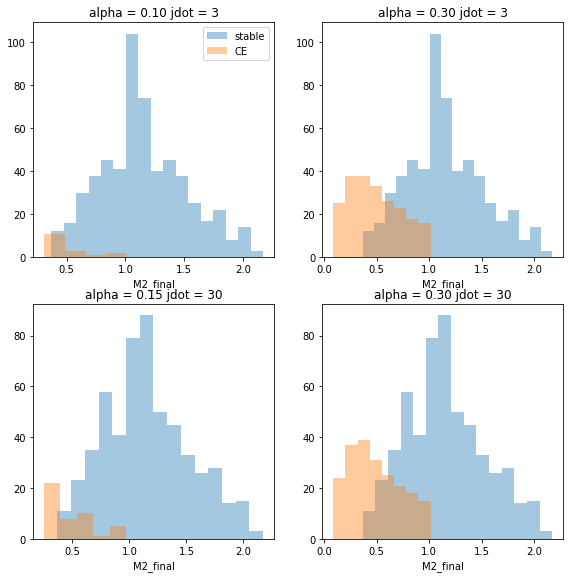

In [ ]:
def plot_dist(df):
    sns.distplot(df[df['stability'] == 'stable']['M2_final'], kde=False, label='stable')
    sns.distplot(df[df['stability'] == 'CE']['M2_final'], kde=False, label='CE')

make_plot(plot_dist, label=True)

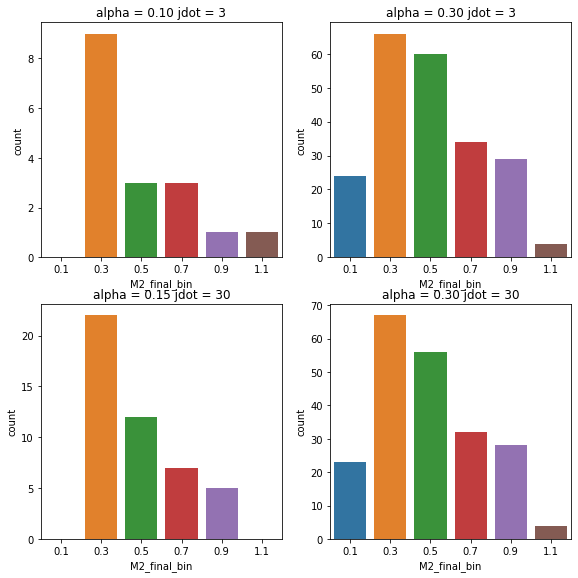

In [ ]:
def plot_dist(df):
    sns.countplot('M2_final_bin', data=df[df['stability'] == 'CE'])

make_plot(plot_dist)

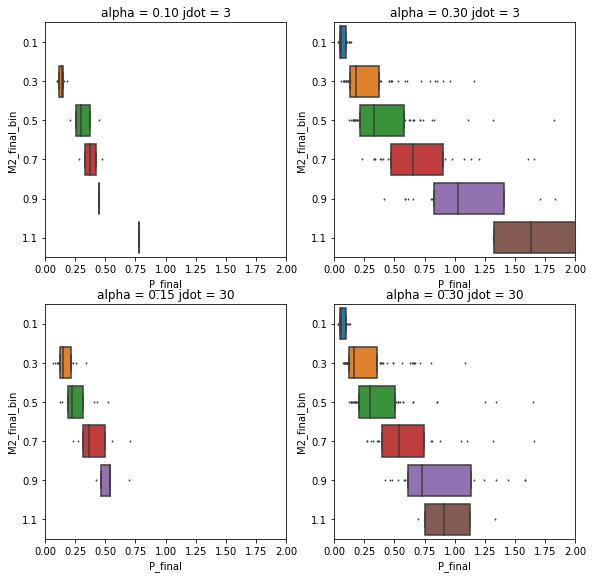

In [ ]:
def plot_dist(df):
    sns.boxplot('P_final', 'M2_final_bin', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
    pl.xlim([0, 2])

make_plot(plot_dist)

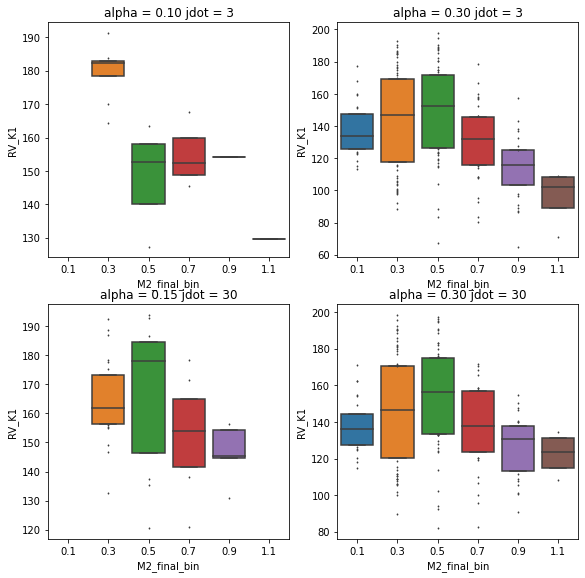

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'RV_K1', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
#     pl.ylim([10000, 33000])

make_plot(plot_dist)

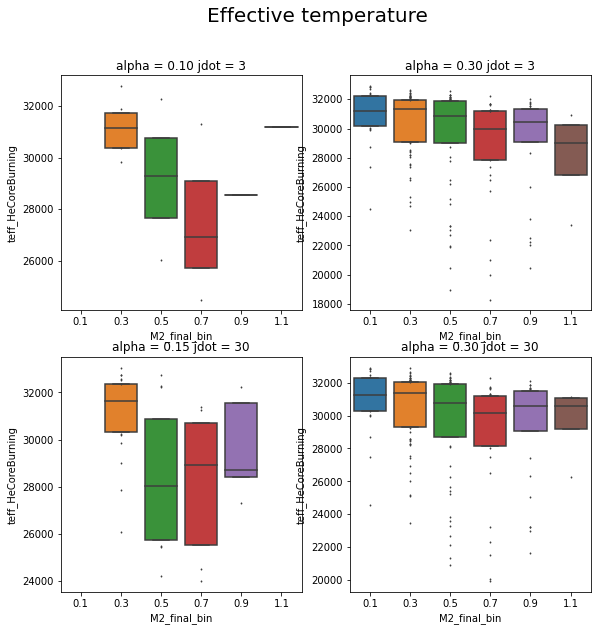

In [ ]:
def plot_dist(df):
    sns.boxplot('M2_final_bin', 'teff_HeCoreBurning', data=df[df['stability'] == 'CE'], fliersize=1, whis=0)
    # pl.ylim([10000, 33000])

make_plot(plot_dist, title="Effective temperature")

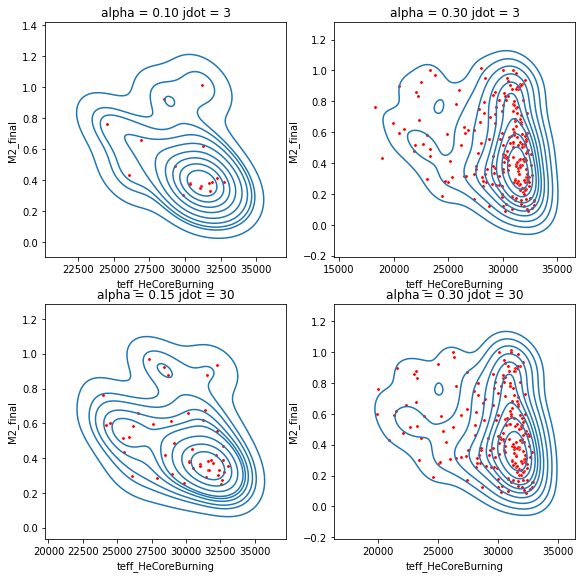

In [ ]:
def plot_dist(df):
    sns.kdeplot('teff_HeCoreBurning', 'M2_final', data=df[df['stability'] == 'CE'])
    sns.scatterplot('teff_HeCoreBurning', 'M2_final', data=df[df['stability'] == 'CE'], color='r', s=10)
    # pl.xlim([0, 3])

make_plot(plot_dist)

## Comparing with observations

Orbital period distribution


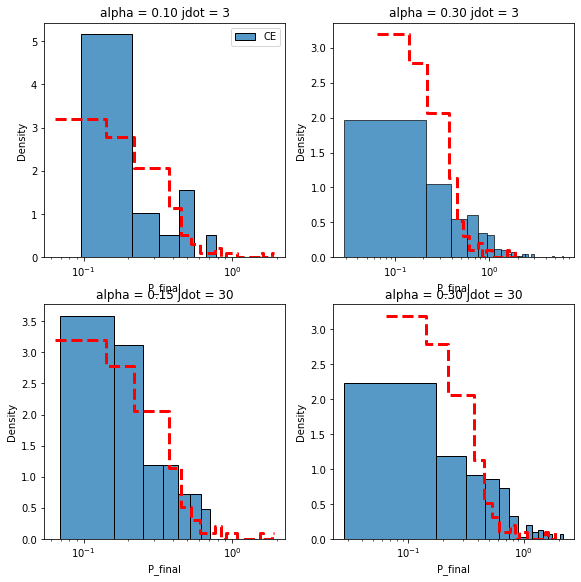

In [ ]:
obs_period = pd.concat([ obsWD['period'], obssdB['period'] ] )

def plot_dist(df):
    sns.histplot(df[df['stability'] == 'CE']['P_final'], stat='density', label='CE')
    sns.histplot(obs_period[obs_period < 2], element='step', fill=False, stat='density', color='r', lw=3, ls='--')
    pl.gca().set_xscale('log')

print('Orbital period distribution')
make_plot(plot_dist, label=True)

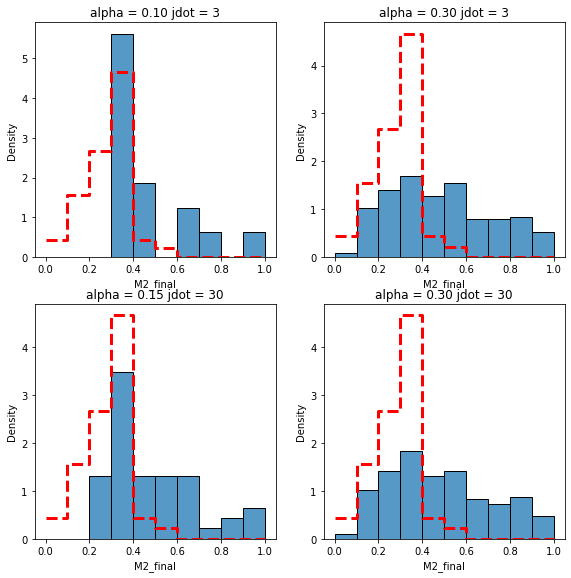

In [ ]:
def plot_dist(df):
    bins = np.linspace(0, 1, 11)
    sns.histplot(df[df['stability'] == 'CE']['M2_final'], stat='density', label='CE', bins=bins)
    sns.histplot(obsWD['M2'], element='step', fill=False, stat='density', color='r', lw=3, ls='--', bins=bins) 


make_plot(plot_dist)

Period vs companion mass

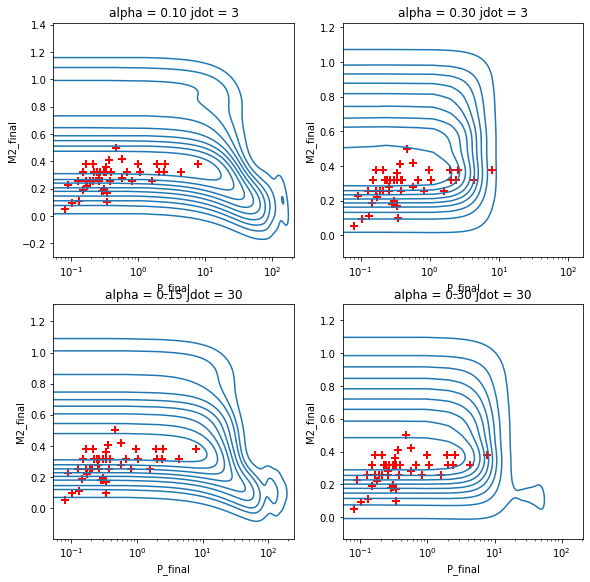

In [ ]:
def plot_dist(df):

    sns.kdeplot('P_final', 'M2_final', data=df[df['stability'] == 'CE'])
    pl.scatter('period', 'M2', data=obsWD, color='r', marker='+', s=50, lw=2)
    pl.gca().set_xscale('log')
    # pl.xlim([0, 3])

make_plot_wd(plot_dist)

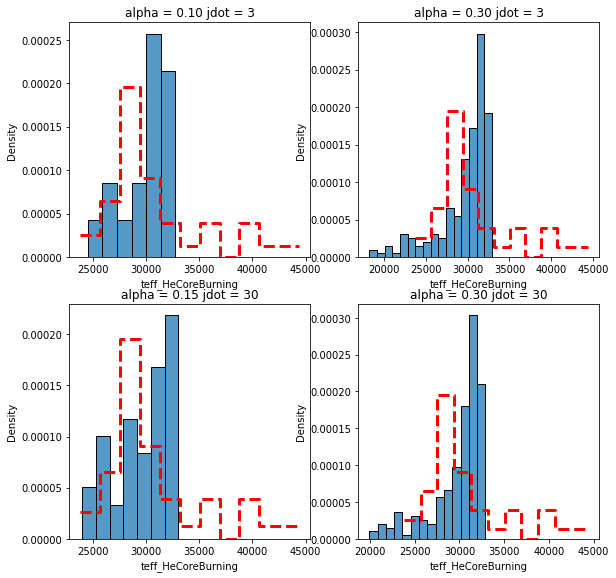

In [ ]:
def plot_dist(df):
    sns.histplot(data=df[df['stability'] == 'CE']['teff_HeCoreBurning'], stat='density')
    sns.histplot(obssdB['Teff'], element='step', fill=False, stat='density', color='r', lw=3, ls='--', )
    # pl.ylim([10000, 33000])

make_plot(plot_dist)

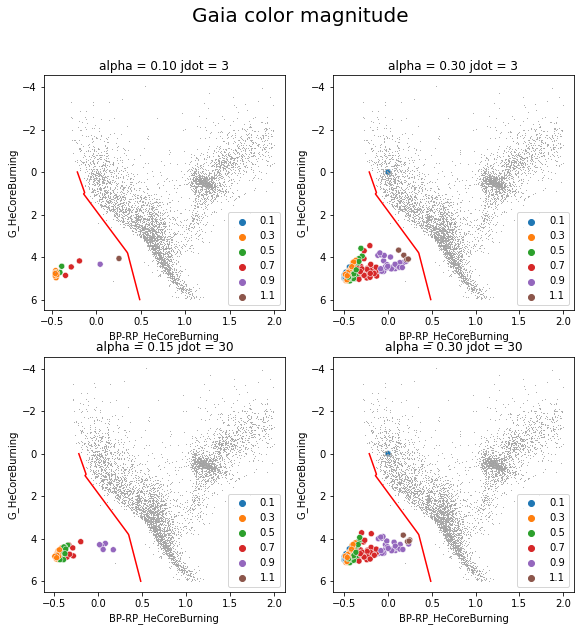

In [ ]:
def plot_gaia(df):
    sns.scatterplot('BP-RP_HeCoreBurning', 'G_HeCoreBurning', data=df[df['stability'] == 'CE'], hue='M2_final_bin')
    sns.scatterplot('bp_rp', 'M_g', data=gaia, color='gray', s=1)
    
    pl.plot(gaia_cut['bp_rp'], gaia_cut['M_g'], '-r')
    
    pl.gca().invert_yaxis()
    
make_plot(plot_gaia, title="Gaia color magnitude")